<a href="https://colab.research.google.com/github/arnaldourbina/HACKATON_Equipo_H12-25-L-Equipo74/blob/feature-preliminar%2FCarga_Limpieza_csv/Experimental_Desarrollo_ModeladoML_P3_FoT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📚 | Importe de las librerias necesarias.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

import joblib


# 📘 | Diccionario de Datos pre-limpieza

| **Nombre**               | **Descripción**                                                        |
|--------------------------|------------------------------------------------------------------------|
| `year`              | El año en el que tuvo lugar el vuelo.                         |
| `month`                   | El mes en el que tuvo lugar el vuelo (1 a 12).                                    |
| `day`                  | El día del mes en el que tuvo lugar el vuelo (1 a 31).                                         |
| `dep_time`           | La hora real local de salida del vuelo, en formato de 24 horas (hhmm).                   |
| `sched_dep_time`                 | La hora local programada de salida del vuelo, en formato de 24 horas (hhmm).                                   |
| `dep_delay`              | La diferencia entre la hora real y la hora programada de salida del vuelo, en minutos.                                 |
| `arr_time`                  | La hora real local de llegada del vuelo, en formato de 24 horas (hhmm).                                         |
| `sched_arr_time`            | La hora local programada de llegada del vuelo, en formato de 24 horas (hhmm).                                    |
| `arr_delay`           | La diferencia entre la hora real y la hora programada de llegada del vuelo, en minutos. Un valor positivo indica un retraso en la llegada.                             |
| `carrier`         | Código de la aerolínea que opera el vuelo, usualmente de dos letras.                                |
| `flight`          | Número de vuelo asignado por la aerolínea para identificar la ruta específica.                           |
| `tailnum`            | Matrícula única del avión, identificador físico de la aeronave.                            |
| `origin`        | Código de tres letras del aeropuerto de salida del vuelo.                   |
| `dest`             | Código de tres letras del aeropuerto de llegada del vuelo.     |
| `air_time`             | Tiempo efectivo de vuelo en minutos, desde despegue hasta aterrizaje.                                   |
| `distance`         | Distancia aproximada entre aeropuertos de origen y destino, generalmente en millas.                                 |
| `hour`                | Hora programada de salida del vuelo, en formato 00–23.                                                      |
| `minute`        | Minuto programado de salida complementando la hora de despegue.                    |
| `time_hour`           | Fecha y hora combinadas del vuelo, normalmente redondeadas a la hora.                                                         |
| `name`         | Nombre descriptivo del aeropuerto.                      |                                   

# 🔎 | Carga y exploración preliminar de los datos.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/flights.csv", index_col=0)

### Explora una selección aleatoria del banco de datos.

In [ ]:
df.sample(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
id,,,,,,,,,,,,,,,,,,,,
331597,2013,9,25,1154.0,1159,-5.0,1246.0,1259,-13.0,B6,1191,N178JB,JFK,ACK,37.0,199,11,59,2013-09-25 11:00:00,JetBlue Airways
10978,2013,1,13,1648.0,1650,-2.0,1930.0,1945,-15.0,UA,1615,N38257,EWR,LAS,325.0,2227,16,50,2013-01-13 16:00:00,United Air Lines Inc.
184182,2013,4,21,907.0,915,-8.0,1144.0,1124,20.0,EV,4495,N16541,EWR,SAV,114.0,708,9,15,2013-04-21 09:00:00,ExpressJet Airlines Inc.
232924,2013,6,12,1455.0,1455,0.0,1640.0,1635,5.0,MQ,3231,N656MQ,JFK,PIT,65.0,340,14,55,2013-06-12 14:00:00,Envoy Air
271316,2013,7,23,830.0,830,0.0,1010.0,1015,-5.0,MQ,3272,N717MQ,LGA,CLE,75.0,419,8,30,2013-07-23 08:00:00,Envoy Air
82053,2013,11,29,1559.0,1535,24.0,1902.0,1857,5.0,B6,1729,N183JB,JFK,RSW,160.0,1074,15,35,2013-11-29 15:00:00,JetBlue Airways
203772,2013,5,12,913.0,919,-6.0,1129.0,1128,1.0,EV,4445,N12957,EWR,IND,107.0,645,9,19,2013-05-12 09:00:00,ExpressJet Airlines Inc.
55436,2013,10,31,1337.0,1340,-3.0,1539.0,1540,-1.0,EV,4687,N24103,EWR,CVG,102.0,569,13,40,2013-10-31 13:00:00,ExpressJet Airlines Inc.
250502,2013,7,1,617.0,620,-3.0,848.0,842,6.0,DL,1743,N646DL,JFK,ATL,113.0,760,6,20,2013-07-01 06:00:00,Delta Air Lines Inc.


### Explora la cantidad de columnas que existen y sus nombres.

In [ ]:
df.columns

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'name'],
      dtype='object')

### Imprime el tipo de dato por columna.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336776 entries, 0 to 336775
Data columns (total 20 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute         

### Imprime por pantalla

Mostramos los valores matematicos de las columnas, junto con sus sus rangos (buscando encontrar valores imposibles).

In [ ]:
df.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,flight,air_time,distance,hour,minute
count,336776.0,336776.000000,336776.000000,328521.000000,336776.000000,328521.000000,328063.000000,336776.000000,327346.000000,336776.000000,327346.000000,336776.000000,336776.000000,336776.000000
mean,2013.0,6.548510,15.710787,1349.109947,1344.254840,12.639070,1502.054999,1536.380220,6.895377,1971.923620,150.686460,1039.912604,13.180247,26.230100
std,0.0,3.414457,8.768607,488.281791,467.335756,40.210061,533.264132,497.457142,44.633292,1632.471938,93.688305,733.233033,4.661316,19.300846
min,2013.0,1.000000,1.000000,1.000000,106.000000,-43.000000,1.000000,1.000000,-86.000000,1.000000,20.000000,17.000000,1.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,906.000000,-5.000000,1104.000000,1124.000000,-17.000000,553.000000,82.000000,502.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1401.000000,1359.000000,-2.000000,1535.000000,1556.000000,-5.000000,1496.000000,129.000000,872.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1945.000000,14.000000,3465.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,8500.000000,695.000000,4983.000000,23.000000,59.000000


### Conteo de la cantidad de nulos que existen por columna.

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
air_time,9430
arr_delay,9430
arr_time,8713
dep_time,8255
dep_delay,8255
tailnum,2512
year,0
month,0
day,0
sched_arr_time,0


# 🧹 | Proceso de limpieza de los datos.

In [ ]:
# Creamos una copia del DataFrame en caso de cualquier problema.
df_copia = df.copy()

In [ ]:
df_copia.head(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
id,,,,,,,,,,,,,,,,,,,,
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01 05:00:00,United Air Lines Inc.
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,2013-01-01 06:00:00,JetBlue Airways
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,2013-01-01 06:00:00,ExpressJet Airlines Inc.
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,2013-01-01 06:00:00,JetBlue Airways


### Explicación y justificación valores nulos.

Se eliminan los valores nulos de las columnas sin información critica para nuestro modelo.

Aqui se decidió eliminar los datos nulos de estas columnas ya que rellenar estos valores nulos con la media, moda u otras opciones, sería contraproducente para nuestro modelo pues este aprendería patrones inexistentes.

In [ ]:
cols_criticas = ["dep_delay", "time_hour", "carrier", "origin", "dest", "distance"]
df_copia = df_copia.dropna(subset=cols_criticas)

In [ ]:
df_copia.tail(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
id,,,,,,,,,,,,,,,,,,,,
336765,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,1816,N354JB,JFK,SYR,41.0,209,22,45,2013-09-30 22:00:00,JetBlue Airways
336766,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,2002,N281JB,JFK,BUF,52.0,301,22,50,2013-09-30 22:00:00,JetBlue Airways
336767,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,486,N346JB,JFK,ROC,47.0,264,22,46,2013-09-30 22:00:00,JetBlue Airways
336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,718,N565JB,JFK,BOS,33.0,187,22,55,2013-09-30 22:00:00,JetBlue Airways
336769,2013,9,30,2349.0,2359,-10.0,325.0,350,-25.0,B6,745,N516JB,JFK,PSE,196.0,1617,23,59,2013-09-30 23:00:00,JetBlue Airways


### Verificación valores nulos

In [ ]:
df_copia.isnull().sum().sort_values(ascending=False)

,0
air_time,1175
arr_delay,1175
arr_time,458
year,0
dep_time,0
day,0
month,0
dep_delay,0
sched_arr_time,0
carrier,0


### Explicación columna_fecha_hora_partida

A partir de time_hour creamos la columna fecha y hora de partida con su tipo de dato correspondiente. Seguidamente eliminamos la columna time_hour ya que su tipo de dato es object y tiene información repetida.

In [ ]:
df_copia["fecha_hora_partida"] = pd.to_datetime(df["time_hour"])

In [ ]:
df_copia = df_copia.drop(columns=["time_hour"])

### Explicación columna target

Creamos la columna target para entrenamiento del modelo. Ademas decidimos con el equipo que el tiempo maximo para considerar un vuelo atrasado será de 15 minutos.

### Explicación columna dep_delay
Se utiliza la columna dep_delay ya que es la columna que nos indica el retraso de salida de un vuelo lo cual es lo que pidió el cliente.

Ejecutando esta acción creamos una columna con datos binarios perfecta para ser utilizada en el modelo predictivo.

# ⚠ | Explicación variable target 0 y 1

### Mayor o igual a 15 minutos ( >= 15 ) = 1
### Menor a 15 minutos ( < 15 ) = 0

In [ ]:
retraso = 15
df_copia["target"] = (df_copia["dep_delay"] >= retraso).astype(int)

In [ ]:
df_copia.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,tailnum,origin,dest,air_time,distance,hour,minute,name,fecha_hora_partida,target
id,,,,,,,,,,,,,,,,,,,,,
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,N14228,EWR,IAH,227.0,1400,5,15,United Air Lines Inc.,2013-01-01 05:00:00,0
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,N24211,LGA,IAH,227.0,1416,5,29,United Air Lines Inc.,2013-01-01 05:00:00,0
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,N619AA,JFK,MIA,160.0,1089,5,40,American Airlines Inc.,2013-01-01 05:00:00,0
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,N804JB,JFK,BQN,183.0,1576,5,45,JetBlue Airways,2013-01-01 05:00:00,0
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,N668DN,LGA,ATL,116.0,762,6,0,Delta Air Lines Inc.,2013-01-01 06:00:00,0


### Tratamiento de Outliers

### Resultados de Outliers

Observamos que en distance hay un minimo de 80¿Km o millas? y un maximo de 4983¿Km o millas? lo cual es coherente con los datos.
En cuanto a dep_delay, todo se encuentra dentro de un rango razonable a excepción de retrasos extremos que contemplan 1301 minutos.

In [ ]:
df_copia[["distance", "dep_delay"]].describe()

,distance,dep_delay
count,328521.000000,328521.000000
mean,1048.570600,12.639070
std,735.908891,40.210061
min,80.000000,-43.000000
25%,509.000000,-5.000000
50%,888.000000,-2.000000
75%,1389.000000,11.000000
max,4983.000000,1301.000000


De manera preventiva se eliminan la distancia en 0. La cual significaría que un vuelo NO despegó pero se encuentra en el dataset.

In [ ]:
df_copia = df_copia[df_copia["distance"] > 0]

### Creación de variables de tiempo.

Creamos variables de tiempo derivadas de fecha y hora de partida.

Dia de semana donde 0 = lunes y 6 = domingo

In [ ]:
df_copia["hora_salida"] = df_copia["fecha_hora_partida"].dt.hour
df_copia["dia_semana"] = df_copia["fecha_hora_partida"].dt.dayofweek  # 0 = lunes
df_copia["mes"] = df_copia["fecha_hora_partida"].dt.month

In [ ]:
df_copia.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,air_time,distance,hour,minute,name,fecha_hora_partida,target,hora_salida,dia_semana,mes
id,,,,,,,,,,,,,,,,,,,,,
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,...,227.0,1400,5,15,United Air Lines Inc.,2013-01-01 05:00:00,0,5,1,1
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,...,227.0,1416,5,29,United Air Lines Inc.,2013-01-01 05:00:00,0,5,1,1
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,...,160.0,1089,5,40,American Airlines Inc.,2013-01-01 05:00:00,0,5,1,1
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,...,183.0,1576,5,45,JetBlue Airways,2013-01-01 05:00:00,0,5,1,1
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,...,116.0,762,6,0,Delta Air Lines Inc.,2013-01-01 06:00:00,0,6,1,1


### Definimos la franja horaria de salida.

In [ ]:
def franja_horaria(hora):
    if hora < 5 or hora >= 22:
        return "noche"
    elif hora < 12:
        return "mañana"
    else:
        return "tarde"

df_copia["franja_horaria"] = df_copia["hora_salida"].apply(franja_horaria)

In [ ]:
df_copia.sample(10)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,distance,hour,minute,name,fecha_hora_partida,target,hora_salida,dia_semana,mes,franja_horaria
id,,,,,,,,,,,,,,,,,,,,,
241963,2013,6,21,2125.0,2055,30.0,12.0,2358,14.0,UA,...,2454,20,55,United Air Lines Inc.,2013-06-21 20:00:00,1,20,4,6,tarde
67615,2013,11,13,1654.0,1700,-6.0,1835.0,1819,16.0,US,...,214,17,0,US Airways Inc.,2013-11-13 17:00:00,0,17,2,11,tarde
223397,2013,6,2,1413.0,1415,-2.0,1545.0,1555,-10.0,AA,...,733,14,15,American Airlines Inc.,2013-06-02 14:00:00,0,14,6,6,tarde
227237,2013,6,6,1327.0,1327,0.0,1544.0,1545,-1.0,F9,...,1620,13,27,Frontier Airlines Inc.,2013-06-06 13:00:00,0,13,3,6,tarde
69375,2013,11,15,1351.0,1358,-7.0,1558.0,1555,3.0,EV,...,946,13,58,ExpressJet Airlines Inc.,2013-11-15 13:00:00,0,13,4,11,tarde
115452,2013,2,5,1955.0,2000,-5.0,2227.0,2208,19.0,EV,...,631,20,0,ExpressJet Airlines Inc.,2013-02-05 20:00:00,0,20,1,2,tarde
298212,2013,8,20,812.0,815,-3.0,1049.0,1057,-8.0,B6,...,1428,8,15,JetBlue Airways,2013-08-20 08:00:00,0,8,1,8,mañana
191378,2013,4,28,2011.0,2000,11.0,2250.0,2245,5.0,DL,...,762,20,0,Delta Air Lines Inc.,2013-04-28 20:00:00,0,20,6,4,tarde
262987,2013,7,14,1533.0,1535,-2.0,1837.0,1850,-13.0,B6,...,1074,15,35,JetBlue Airways,2013-07-14 15:00:00,0,15,6,7,tarde


### Se eliminan las columnas que generan redundancia.

Se eliminan estas columnas ya que la información que contienen ya está representada en las columnas creadas fecha_hora_partida, hora_salida, dia_semana, mes y franja horaria. Si no se eliminan corremos el riesgo de tener valores duplicados confundiendo al modelo final.

In [ ]:
df_copia = df_copia.drop(columns=["year", "month", "day", "hour", "minute"])

In [ ]:
df_copia.columns

Index(['dep_time', 'sched_dep_time', 'dep_delay', 'arr_time', 'sched_arr_time',
       'arr_delay', 'carrier', 'flight', 'tailnum', 'origin', 'dest',
       'air_time', 'distance', 'name', 'fecha_hora_partida', 'target',
       'hora_salida', 'dia_semana', 'mes', 'franja_horaria'],
      dtype='object')

# 🧭 | Mapeo de las columnas segun contrato (DS-Backend)

Se definió que la data a utilizar será:

- aerolinea
- origen
- destino
- fecha_partida
- distancia_km

In [ ]:
df_copia["aerolinea"] = df_copia["carrier"]
df_copia["origen"] = df_copia["origin"]
df_copia["destino"] = df_copia["dest"]
df_copia["distancia_km"] = df_copia["distance"] * 1.60934  # transformamos millas a kilometros.

### Explicación eliminación de columnas con información poco relevante.

Dentro de este set de columnas, existen aquellas que contienen información del futuro las cuales no tienen relevancia para predecir el retraso de despegue de un vuelo. Estas columnas contienen data que el modelo no conoce antes del vuelo.

Otras columnas tienen data poco util o que ya se encuentran representadas por columnas creadas anteriormente.

In [ ]:
df_copia = df_copia.drop(columns=["arr_time", "sched_arr_time", "arr_delay","air_time", "flight", "tailnum", "name","sched_dep_time", "dep_time"])
df_copia.tail(10)

,dep_delay,carrier,origin,dest,distance,fecha_hora_partida,target,hora_salida,dia_semana,mes,franja_horaria,aerolinea,origen,destino,distancia_km
id,,,,,,,,,,,,,,,
336760,72.0,EV,EWR,STL,872,2013-09-30 20:00:00,1,20,0,9,tarde,EV,EWR,STL,1403.34448
336761,-14.0,B6,JFK,PWM,273,2013-09-30 22:00:00,0,22,0,9,noche,B6,JFK,PWM,439.34982
336762,80.0,UA,EWR,SFO,2565,2013-09-30 21:00:00,1,21,0,9,tarde,UA,EWR,SFO,4127.95710
336763,154.0,B6,JFK,MCO,944,2013-09-30 20:00:00,1,20,0,9,tarde,B6,JFK,MCO,1519.21696
336764,-8.0,B6,JFK,BTV,266,2013-09-30 22:00:00,0,22,0,9,noche,B6,JFK,BTV,428.08444
336765,-5.0,B6,JFK,SYR,209,2013-09-30 22:00:00,0,22,0,9,noche,B6,JFK,SYR,336.35206
336766,-10.0,B6,JFK,BUF,301,2013-09-30 22:00:00,0,22,0,9,noche,B6,JFK,BUF,484.41134
336767,-5.0,B6,JFK,ROC,264,2013-09-30 22:00:00,0,22,0,9,noche,B6,JFK,ROC,424.86576
336768,12.0,B6,JFK,BOS,187,2013-09-30 22:00:00,0,22,0,9,noche,B6,JFK,BOS,300.94658


### Chequeo de distribución del target.

Observamos que se encuentra presente la variable 0 (**Puntual**) mas veces que la variable 1 (**Retrasado**). Lo que nos quiere decir que el conjunto de datos está desbalanceado.

<Axes: xlabel='target'>

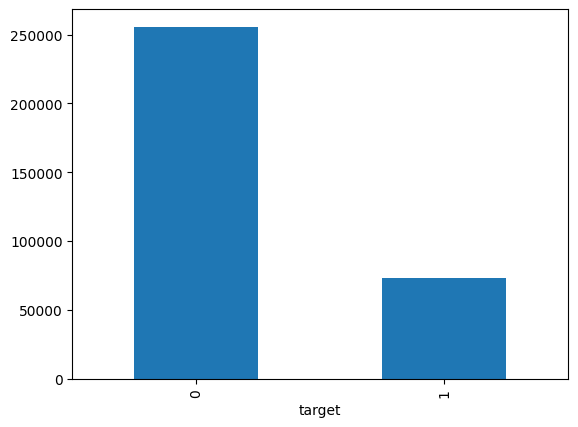

In [ ]:
df_copia["target"].value_counts(normalize=True)
df_copia["target"].value_counts().plot(kind="bar")

### Renombre de las columnas.

Se cambian los nombres de aquellas columnas en ingles a su igual en español.

In [ ]:
df_copia = df_copia.rename(columns={
    "dep_delay": "retraso_salida_min",
    "carrier": "aerolinea",
    "origin": "origen",
    "dest": "destino",
    "distance": "distancia_millas"
})

df_copia["distancia_km"] = df_copia["distancia_millas"] * 1.60934

In [ ]:
df_copia.head(10)

,retraso_salida_min,aerolinea,origen,destino,distancia_millas,fecha_hora_partida,target,hora_salida,dia_semana,mes,franja_horaria,aerolinea,origen,destino,distancia_km
id,,,,,,,,,,,,,,,
0,2.0,UA,EWR,IAH,1400,2013-01-01 05:00:00,0,5,1,1,mañana,UA,EWR,IAH,2253.07600
1,4.0,UA,LGA,IAH,1416,2013-01-01 05:00:00,0,5,1,1,mañana,UA,LGA,IAH,2278.82544
2,2.0,AA,JFK,MIA,1089,2013-01-01 05:00:00,0,5,1,1,mañana,AA,JFK,MIA,1752.57126
3,-1.0,B6,JFK,BQN,1576,2013-01-01 05:00:00,0,5,1,1,mañana,B6,JFK,BQN,2536.31984
4,-6.0,DL,LGA,ATL,762,2013-01-01 06:00:00,0,6,1,1,mañana,DL,LGA,ATL,1226.31708
5,-4.0,UA,EWR,ORD,719,2013-01-01 05:00:00,0,5,1,1,mañana,UA,EWR,ORD,1157.11546
6,-5.0,B6,EWR,FLL,1065,2013-01-01 06:00:00,0,6,1,1,mañana,B6,EWR,FLL,1713.94710
7,-3.0,EV,LGA,IAD,229,2013-01-01 06:00:00,0,6,1,1,mañana,EV,LGA,IAD,368.53886
8,-3.0,B6,JFK,MCO,944,2013-01-01 06:00:00,0,6,1,1,mañana,B6,JFK,MCO,1519.21696


In [ ]:
df_copia["distancia_km"] = df_copia["distancia_km"].round(2)
df_copia = df_copia.drop(columns=["distancia_millas"])

In [ ]:
df_copia.head(10)

,retraso_salida_min,aerolinea,origen,destino,fecha_hora_partida,target,hora_salida,dia_semana,mes,franja_horaria,aerolinea,origen,destino,distancia_km
id,,,,,,,,,,,,,,
0,2.0,UA,EWR,IAH,2013-01-01 05:00:00,0,5,1,1,mañana,UA,EWR,IAH,2253.08
1,4.0,UA,LGA,IAH,2013-01-01 05:00:00,0,5,1,1,mañana,UA,LGA,IAH,2278.83
2,2.0,AA,JFK,MIA,2013-01-01 05:00:00,0,5,1,1,mañana,AA,JFK,MIA,1752.57
3,-1.0,B6,JFK,BQN,2013-01-01 05:00:00,0,5,1,1,mañana,B6,JFK,BQN,2536.32
4,-6.0,DL,LGA,ATL,2013-01-01 06:00:00,0,6,1,1,mañana,DL,LGA,ATL,1226.32
5,-4.0,UA,EWR,ORD,2013-01-01 05:00:00,0,5,1,1,mañana,UA,EWR,ORD,1157.12
6,-5.0,B6,EWR,FLL,2013-01-01 06:00:00,0,6,1,1,mañana,B6,EWR,FLL,1713.95
7,-3.0,EV,LGA,IAD,2013-01-01 06:00:00,0,6,1,1,mañana,EV,LGA,IAD,368.54
8,-3.0,B6,JFK,MCO,2013-01-01 06:00:00,0,6,1,1,mañana,B6,JFK,MCO,1519.22


In [ ]:
df_copia["aerolinea"].head()

,aerolinea,aerolinea
id,,
0,UA,UA
1,UA,UA
2,AA,AA
3,B6,B6
4,DL,DL


In [ ]:
df_copia["aerolinea"].shape

(328521, 2)

In [ ]:
df_copia.columns

Index(['retraso_salida_min', 'aerolinea', 'origen', 'destino',
       'fecha_hora_partida', 'target', 'hora_salida', 'dia_semana', 'mes',
       'franja_horaria', 'aerolinea', 'origen', 'destino', 'distancia_km'],
      dtype='object')

In [ ]:
df_copia = df_copia.loc[:, ~df_copia.columns.duplicated()]

In [ ]:
df_copia.head(5)

,retraso_salida_min,aerolinea,origen,destino,fecha_hora_partida,target,hora_salida,dia_semana,mes,franja_horaria,distancia_km
id,,,,,,,,,,,
0,2.0,UA,EWR,IAH,2013-01-01 05:00:00,0,5,1,1,mañana,2253.08
1,4.0,UA,LGA,IAH,2013-01-01 05:00:00,0,5,1,1,mañana,2278.83
2,2.0,AA,JFK,MIA,2013-01-01 05:00:00,0,5,1,1,mañana,1752.57
3,-1.0,B6,JFK,BQN,2013-01-01 05:00:00,0,5,1,1,mañana,2536.32
4,-6.0,DL,LGA,ATL,2013-01-01 06:00:00,0,6,1,1,mañana,1226.32


# 📘 | Diccionario de Datos post-limpieza

| **Nombre**               | **Descripción**                                                        |
|--------------------------|------------------------------------------------------------------------|
| `retraso_salida_min`              | Minutos de retraso en la salida real del vuelo respecto a la hora programada.                         |
| `aerolinea`                   | Código de la aerolínea que opera el vuelo, normalmente de dos letras.                                    |
| `origen`                  | Código IATA de tres letras del aeropuerto desde el cual despega el vuelo.                                         |
| `destino`           | Codigo de tres letras del aeropuerto al que llega el vuelo.                   |
| `fecha_hora_partida`                 | Fecha y hora de programadas del vuelo combinadas en un solo campo de tipo date-time.                                   |
| `hora_salida`              | Hora del día (0–23) derivada de fecha_hora_partida para el despegue.                                 |
| `dia_semana`                  | Dia de la semana del vuelo, donde 0 = Lunes y 6 = Domingo.                                         |
| `mes`            | Mes del año en que se programa el vuelo, valor desde 1 a 12.                                    |
| `franja_horaria`           | Categoría de tiempo del día: mañana, tarde o noche según la hora de salida.                             |
| `distancia_km`         | Distancia entre aeropuertos medida en kilómetros, convertida desde distancia_millas.                                |
| `target`          | Variable objetivo: 0 = vuelo puntual, 1 = vuelo retrasado en la salida.

#  | EDA

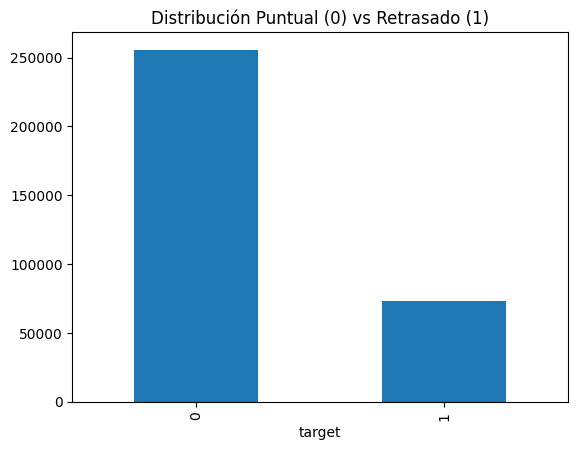

In [ ]:
# Distribución target
df_copia["target"].value_counts(normalize=True)

df_copia["target"].value_counts().plot(kind="bar")
plt.title("Distribución Puntual (0) vs Retrasado (1)")
plt.show()

### Porcentaje de retrasos por aerolinea

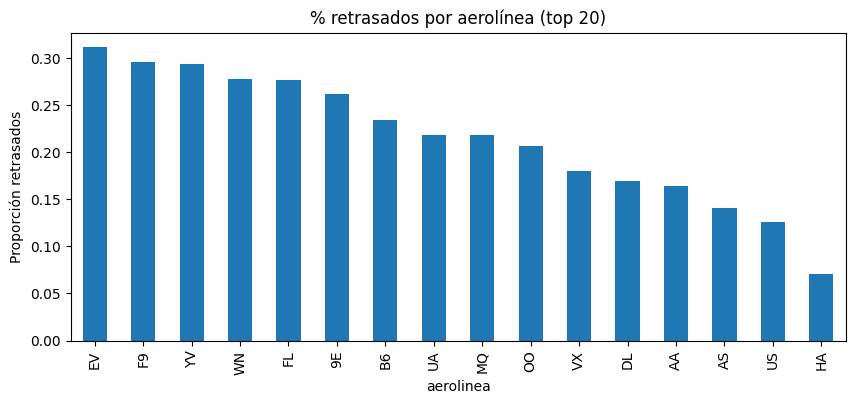

In [ ]:
df_copia.groupby("aerolinea")["target"].mean().sort_values(ascending=False).head(20).plot(kind="bar", figsize=(10,4))
plt.title("% retrasados por aerolínea (top 20)")
plt.ylabel("Proporción retrasados")
plt.show()

# Porcentaje de retrasos por hora de salida.

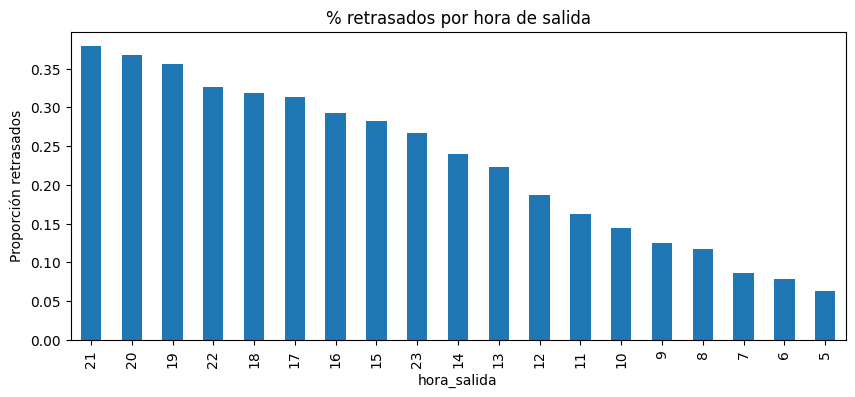

In [ ]:
df_copia.groupby("hora_salida")["target"].mean().sort_values(ascending=False).plot(kind="bar", figsize=(10,4))
plt.title("% retrasados por hora de salida")
plt.ylabel("Proporción retrasados")
plt.show()

# Preparación de los datos para modelado

In [ ]:
FEATURES = [
    "aerolinea",
    "origen",
    "destino",
    "distancia_km",
    "hora_salida",
    "dia_semana",
    "mes",
    "franja_horaria"
]
TARGET = "target"

df_model = df_copia.dropna(subset=FEATURES + [TARGET])

X = df_model[FEATURES]
y = df_model[TARGET]

numeric_features = ["distancia_km", "hora_salida", "dia_semana", "mes"]
categorical_features = ["aerolinea", "origen", "destino", "franja_horaria"]

numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


=== Logistic Regression ===
Accuracy: 0.6184004261471729
Precision: 0.32737625065824116
Recall: 0.6820955907563602
F1: 0.44241332532746236
              precision    recall  f1-score   support

           0       0.87      0.60      0.71     51122
           1       0.33      0.68      0.44     14583

    accuracy                           0.62     65705
   macro avg       0.60      0.64      0.58     65705
weighted avg       0.75      0.62      0.65     65705



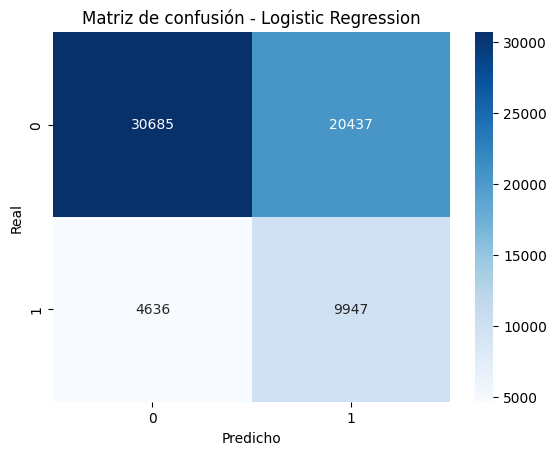

In [ ]:
logreg_clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(
        max_iter=1000,
        class_weight="balanced",
        random_state=42
    ))
])

logreg_clf.fit(X_train, y_train)

y_pred_lr = logreg_clf.predict(X_test)

print("=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1:", f1_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de confusión - Logistic Regression")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()


=== Random Forest ===
Accuracy: 0.595099307510844
Precision: 0.3220956045582359
Recall: 0.7462113419735308
F1: 0.44996692027786966
              precision    recall  f1-score   support

           0       0.88      0.55      0.68     51122
           1       0.32      0.75      0.45     14583

    accuracy                           0.60     65705
   macro avg       0.60      0.65      0.56     65705
weighted avg       0.76      0.60      0.63     65705



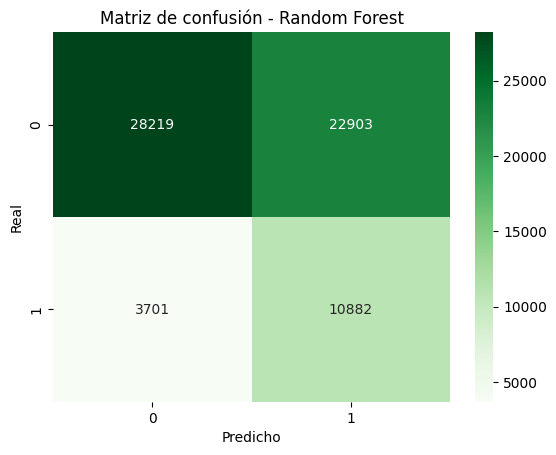

In [ ]:
rf_clf = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_leaf=5,
        class_weight="balanced",
        random_state=42,
        n_jobs=-1
    ))
])

rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)

print("=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1:", f1_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Matriz de confusión - Random Forest")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()


In [ ]:
modelo_final = rf_clf

def preprocesar_entrada_json(json_vuelo):
    fecha = pd.to_datetime(json_vuelo["fecha_partida"])
    hora_salida = fecha.hour
    dia_semana = fecha.dayofweek
    mes = fecha.month

    def franja(h):
        if h < 5 or h >= 22:
            return "noche"
        elif h < 12:
            return "mañana"
        else:
            return "tarde"

    franja_horaria = franja(hora_salida)

    datos = {
        "aerolinea": [json_vuelo["aerolinea"]],
        "origen": [json_vuelo["origen"]],
        "destino": [json_vuelo["destino"]],
        "distancia_km": [json_vuelo["distancia_km"]],
        "hora_salida": [hora_salida],
        "dia_semana": [dia_semana],
        "mes": [mes],
        "franja_horaria": [franja_horaria]
    }

    return pd.DataFrame(datos, columns=FEATURES)

def predecir_vuelo(json_vuelo, modelo, threshold=0.5):
    df_entrada = preprocesar_entrada_json(json_vuelo)
    prob_retraso = modelo.predict_proba(df_entrada)[0, 1]
    prevision = "Retrasado" if prob_retraso >= threshold else "Puntual"
    return {
        "prevision": prevision,
        "probabilidad": float(prob_retraso)
    }

# Prueba rápida
ejemplo_json = {
    "aerolinea": "AA",
    "origen": "JFK",
    "destino": "LAX",
    "fecha_partida": "2013-01-03T14:30:00",
    "distancia_km": 4000
}

predecir_vuelo(ejemplo_json, modelo_final)


{'prevision': 'Puntual', 'probabilidad': 0.46853637718597263}

In [ ]:
joblib.dump(modelo_final, "flight_delay_pipeline.joblib")

['flight_delay_pipeline.joblib']

In [ ]:
from google.colab import files
files.download("flight_delay_pipeline.joblib")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>